<a href="https://colab.research.google.com/github/hewettac/OOP-New/blob/main/ML_2_17_26_TTD_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# used Copilot (Microsoft AI) to generate new dataset of 550 values

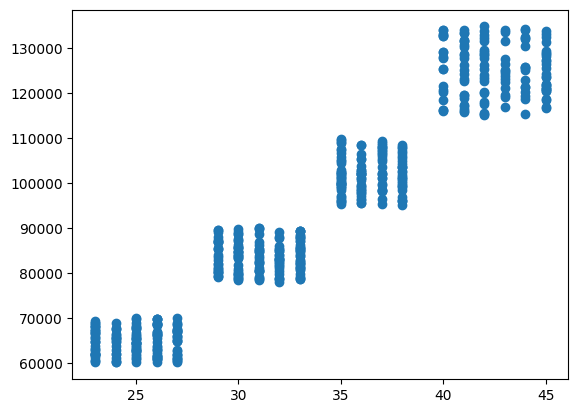

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('synthetic_clustered_data.csv')
df.head()

plt.scatter(df.Age, df.Income)
plt.show()



In [6]:
# find sse values

sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_)

sse

[280664268006.54535,
 69683396810.12067,
 30977163611.413345,
 9053574831.761324,
 5961430772.314764,
 5036009266.525128,
 3614611014.894129,
 2731305481.3252006,
 2063006061.7228677]

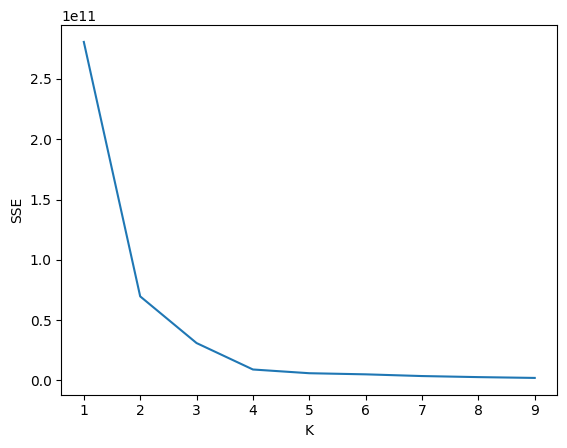

In [7]:
# plot sse and find elbow

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,10),sse)
plt.show()

In [16]:
# determine number of clusters
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [17]:
# predict what clusters people fall into
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,

In [18]:
# assign clusters as column

df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Person1,26,60860,1
1,Person2,25,65191,1
2,Person3,27,65734,1
3,Person4,24,60466,1
4,Person5,25,65578,1


<function matplotlib.pyplot.show(close=None, block=None)>

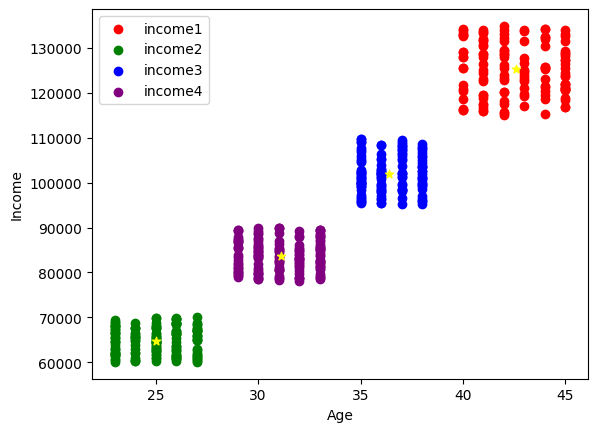

In [19]:
# graph clusters

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Age, df1.Income, color = 'red', label = 'income1')
plt.scatter(df2.Age, df2.Income, color = 'green', label = 'income2')
plt.scatter(df3.Age, df3.Income, color = 'blue', label = 'income3')
plt.scatter(df4.Age, df4.Income, color = 'purple', label = 'income4')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

# show centroids for each cluster

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.show

In [20]:
# scale the data within 0-1 range

df_new = df.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_new[['Income']])
df_new['Income'] = scaler.transform(df_new[['Income']])

scaler.fit(df[['Age']])
df_new['Age'] = scaler.transform(df_new[['Age']])
df_new

,Name,Age,Income,cluster
0,Person1,0.136364,0.010636,1
1,Person2,0.090909,0.068509,1
2,Person3,0.181818,0.075765,1
3,Person4,0.045455,0.005372,1
4,Person5,0.090909,0.073680,1
...,...,...,...,...
545,Person546,0.772727,0.749041,0
546,Person547,0.954545,0.965699,0
547,Person548,0.772727,0.805871,0
548,Person549,0.909091,0.988348,0


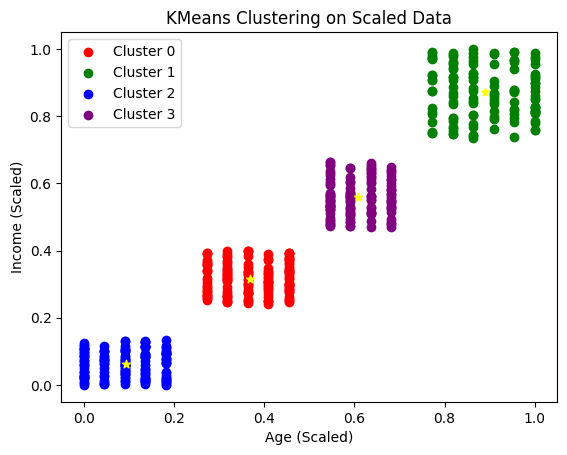

In [21]:
# Rerun KMeans on the scaled data (df_new)
km_scaled = KMeans(n_clusters=4)
y_predicted_scaled = km_scaled.fit_predict(df_new[['Age', 'Income']])

df_new['cluster'] = y_predicted_scaled

# Graph clusters using scaled data from df_new

df1_scaled = df_new[df_new.cluster==0]
df2_scaled = df_new[df_new.cluster==1]
df3_scaled = df_new[df_new.cluster==2]
df4_scaled = df_new[df_new.cluster==3]

plt.scatter(df1_scaled.Age, df1_scaled.Income, color = 'red', label = 'Cluster 0')
plt.scatter(df2_scaled.Age, df2_scaled.Income, color = 'green', label = 'Cluster 1')
plt.scatter(df3_scaled.Age, df3_scaled.Income, color = 'blue', label = 'Cluster 2')
plt.scatter(df4_scaled.Age, df4_scaled.Income, color = 'purple', label = 'Cluster 3')

plt.xlabel('Age (Scaled)')
plt.ylabel('Income (Scaled)')
plt.legend()

# show centroids for each cluster from the scaled data

plt.scatter(km_scaled.cluster_centers_[:,0], km_scaled.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.title('KMeans Clustering on Scaled Data')
plt.show()